In [1]:
import dataset
from importlib import reload
import skimage
import numpy as np

D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: divide by zero encountered in log
  im = axes[1].imshow(np.log(tiled_images))


0:	 [x = -4.910,], [y = -2.522,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1620.043,], [bg = 29.960,],
12:	 [x = -9.243,], [y = -2.964,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1774.042,], [bg = 50.148,],
13:	 [x = 2.733,], [y = 5.056,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1660.318,], [bg = 51.600,],
6:	 [x = 3.469,], [y = -7.173,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1334.842,], [bg = 75.571,],
5:	 [x = -2.682,], [y = -6.439,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1855.461,], [bg = 96.234,],
9:	 [x = -7.441,], [y = 4.334,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1988.622,], [bg = 6.163,],
15:	 [x = -6.284,], [y = -4.853,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1517.798,], [bg = 5.024,],
1:	 [x = 3.422,], [y = -2.901,], [sig_x = 5.000,], [sig_y = 5.000,], [A = 1530.409,], [bg = 58.829,],


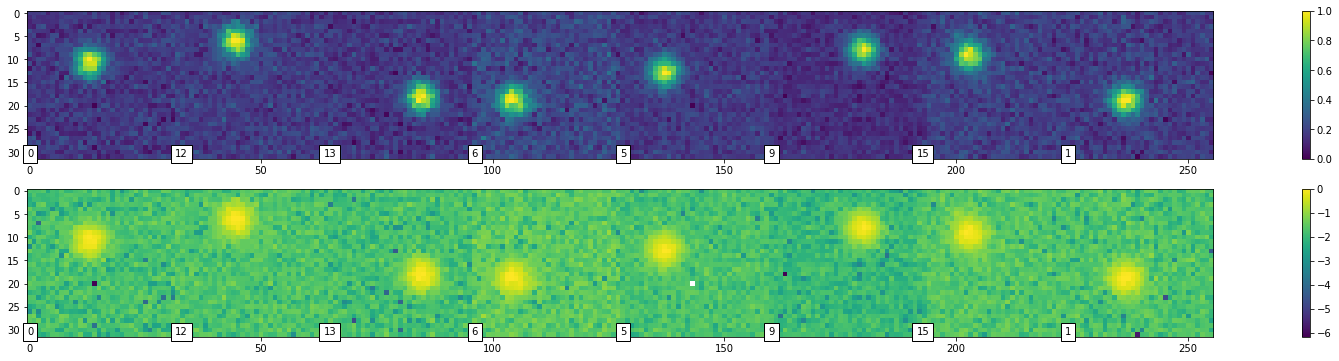

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


11:	 [x = -5.353,], [y = 6.877,], [A = 1893.416,], [bg = 37.848,],
15:	 [x = -0.579,], [y = 8.287,], [A = 1678.822,], [bg = 34.792,],
13:	 [x = -3.466,], [y = -8.539,], [A = 531.073,], [bg = 24.828,],
9:	 [x = 8.346,], [y = -5.717,], [A = 824.257,], [bg = 9.563,],
8:	 [x = 10.073,], [y = -6.826,], [A = 989.667,], [bg = 38.073,],
2:	 [x = 5.879,], [y = -4.414,], [A = 1636.970,], [bg = 4.170,],
14:	 [x = 7.326,], [y = 1.318,], [A = 1660.019,], [bg = 76.581,],
10:	 [x = -2.916,], [y = -6.895,], [A = 1900.335,], [bg = 39.749,],


D:\Github\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


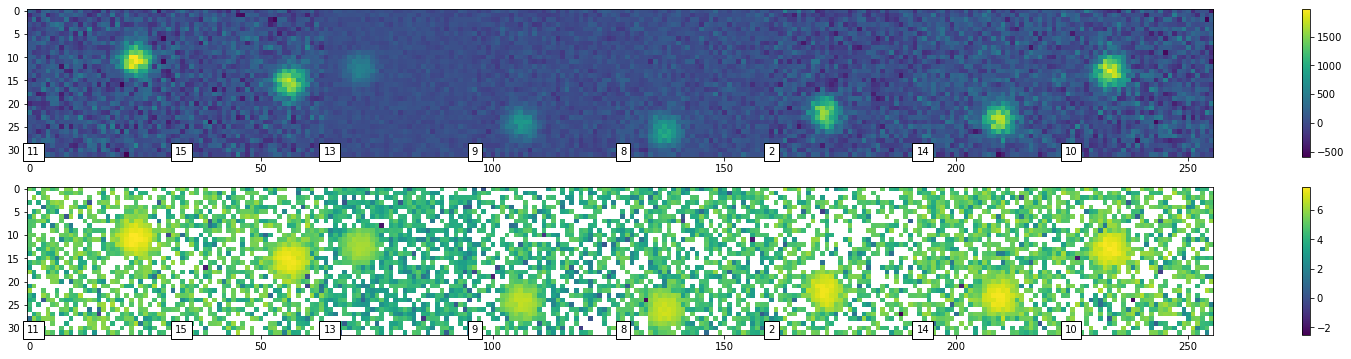

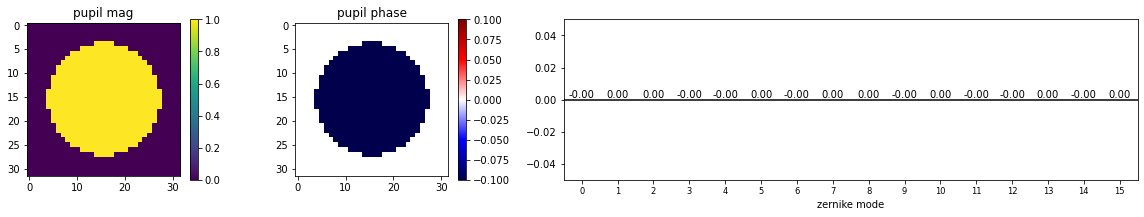

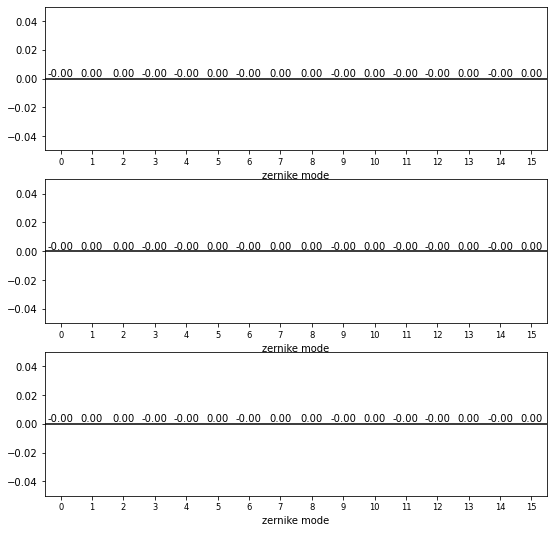

In [3]:
reload(dataset)
import zernike
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

0:	 [x = -8.946,], [y = 13.412,], [A = 1675.368,], [bg = 74.410,],
2:	 [x = -3.839,], [y = 6.459,], [A = 699.073,], [bg = 96.533,],
15:	 [x = -5.626,], [y = -1.485,], [A = 1092.748,], [bg = 81.906,],
11:	 [x = 11.506,], [y = 9.141,], [A = 746.239,], [bg = 20.199,],
1:	 [x = 9.909,], [y = -4.447,], [A = 1575.173,], [bg = 82.327,],
4:	 [x = 1.693,], [y = 3.572,], [A = 1381.195,], [bg = 66.822,],
12:	 [x = -0.231,], [y = -6.776,], [A = 919.582,], [bg = 17.336,],
8:	 [x = 10.418,], [y = -2.656,], [A = 1280.678,], [bg = 11.628,],


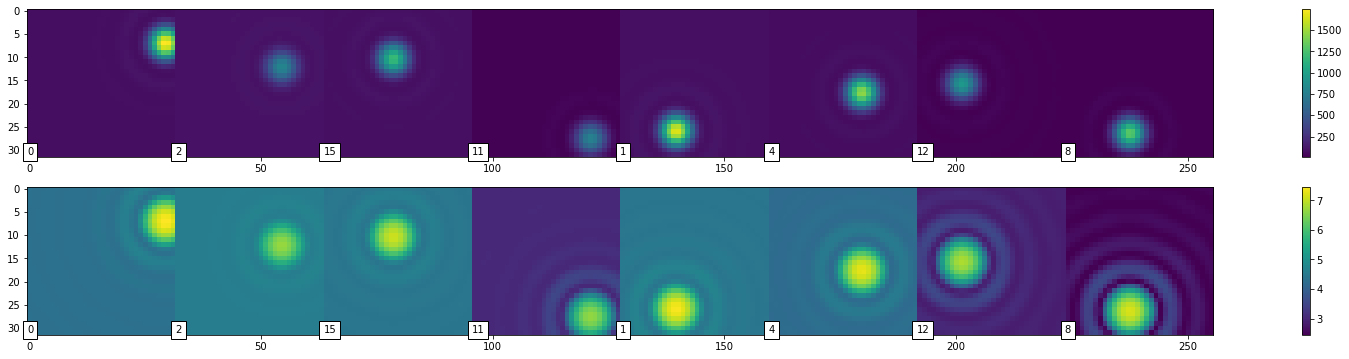

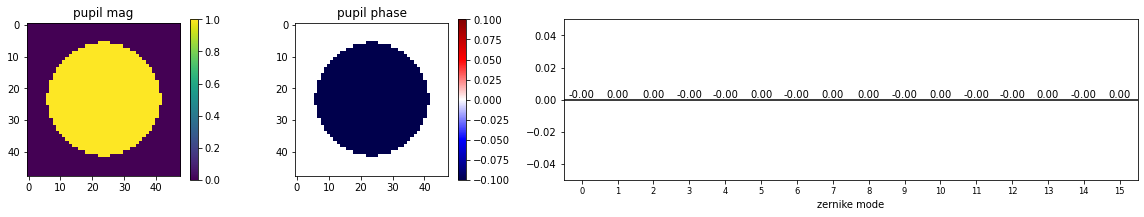

In [4]:
reload(dataset)

a = dataset.FourierOptics2DPSFDataset(length=16,
                                      # psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

11:	 [x = 3.232,], [y = 6.497,], [z = 3.228,], [A = 1451.265,], [bg = 74.496,],
0:	 [x = -10.690,], [y = -1.170,], [z = -1.104,], [A = 802.811,], [bg = 87.178,],
2:	 [x = -4.952,], [y = -9.802,], [z = 7.539,], [A = 625.314,], [bg = 32.044,],
13:	 [x = 5.483,], [y = 9.315,], [z = -0.051,], [A = 1287.211,], [bg = 85.300,],
8:	 [x = 3.643,], [y = 10.533,], [z = 1.528,], [A = 922.596,], [bg = 63.256,],
1:	 [x = 8.649,], [y = -0.487,], [z = -4.964,], [A = 681.648,], [bg = 31.779,],
12:	 [x = 3.391,], [y = 8.757,], [z = -7.136,], [A = 1165.428,], [bg = 91.898,],
9:	 [x = -1.425,], [y = 3.570,], [z = -5.801,], [A = 1504.368,], [bg = 25.019,],


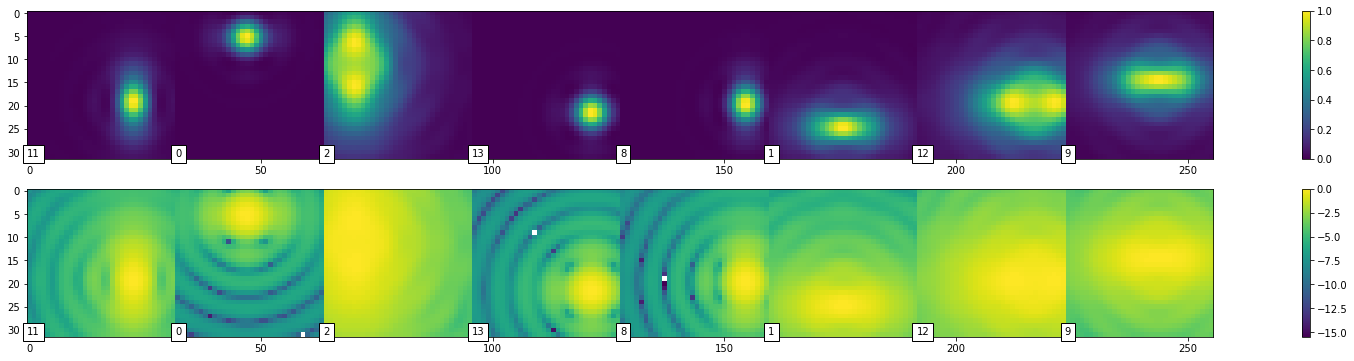

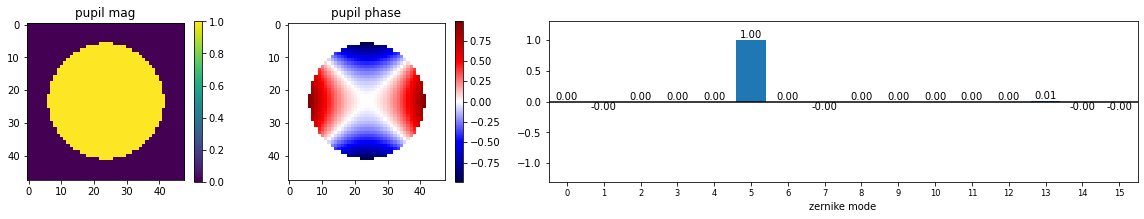

In [5]:
reload(dataset)

a = dataset.FourierOptics3DPSFDataset(length=16, psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

5:	 [x = -0.140, 6.710, 15.952, -10.998, -2.839, -2.835, 9.443, -1.229,], [y = 0.964, 16.685, 2.676, 0.587, 13.224, -2.514, -6.897, 4.363,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [A = 1152.951, 790.312, 1737.025, 1386.424, 1044.507, 1857.722, 1635.330, 963.181,], [bg = 81.675,],
6:	 [x = 3.668, -9.464, 8.630, -6.584, -5.573, 15.719, -10.787, -8.741,], [y = 12.074, -9.217, 11.098, 4.635, 20.514, -12.269, 7.726, 12.582,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [A = 843.581, 913.234, 1899.814, 1715.312, 1776.340, 569.476, 638.603, 1966.388,], [bg = 80.177,],
11:	 [x = 5.942, 8.588, -0.756, -15.363, 5.969, 11.221, -1.586, 7.606,], [y = -9.141, 12.638, -18.164, 10.530, 14.408, 8.228, 13.704, 13.612,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000,

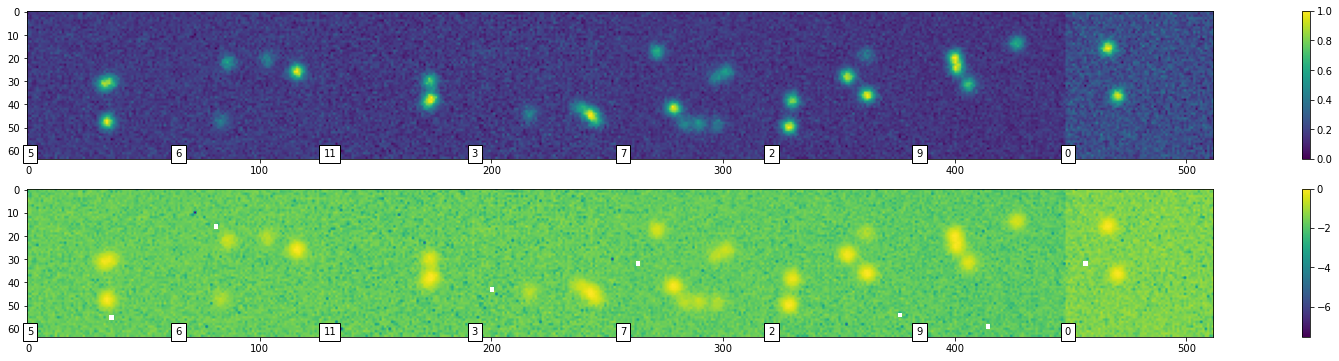

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

13:	 [x = -15.441, -16.752, -0.514, 2.776, 5.980, -13.813, -8.941, 5.345,], [y = 18.361, 20.131, 17.362, 12.689, 8.751, 8.674, 23.289, 7.183,], [z = 1.085, -4.422, -8.917, -8.970, 3.007, 1.540, 9.090, -8.752,], [A = 1692.092, 1983.552, 739.215, 692.291, 599.975, 1493.689, 1399.400, 694.562,], [bg = 49.018,],
7:	 [x = 3.817, 7.218, 3.694, -3.714, -6.937, -12.290, 12.208, 5.509,], [y = 12.414, 10.301, -8.448, -15.205, 10.944, 5.552, -12.528, -16.006,], [z = -1.790, -9.728, 2.622, -7.535, -0.928, 5.481, -7.824, -6.759,], [A = 973.324, 1337.393, 1494.578, 1202.907, 1468.308, 1555.752, 1441.326, 1613.779,], [bg = 54.987,],
5:	 [x = 9.532, 5.249, 13.689, -6.739, -3.184, 11.204, 10.904, 14.783,], [y = 3.915, 18.857, -8.873, -9.721, 4.273, 9.627, -3.306, -6.999,], [z = 8.046, -3.463, -2.679, 4.547, 1.192, 5.715, 4.045, 5.608,], [A = 634.905, 875.703, 1263.660, 1162.921, 662.338, 614.880, 872.062, 761.921,], [bg = 27.376,],
11:	 [x = 12.355, -0.449, 14.459, 5.829, -0.994, -3.883, 5.001, -14.720

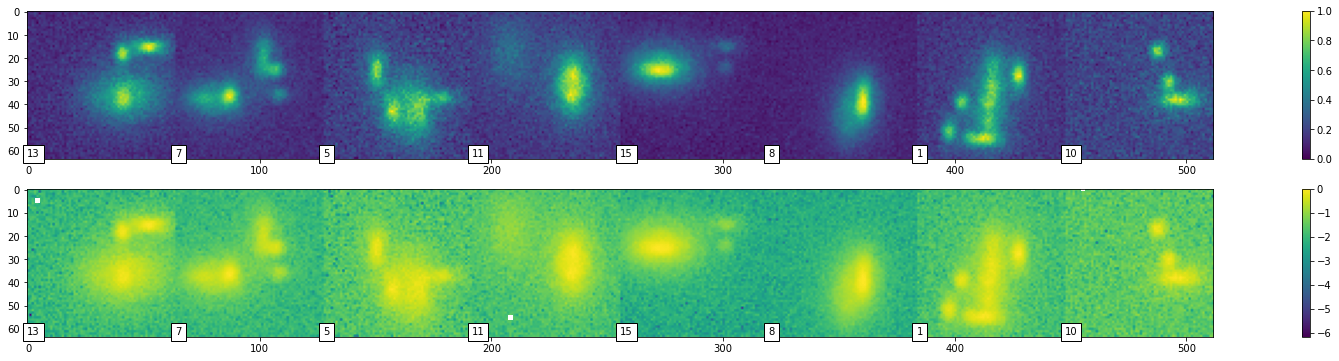

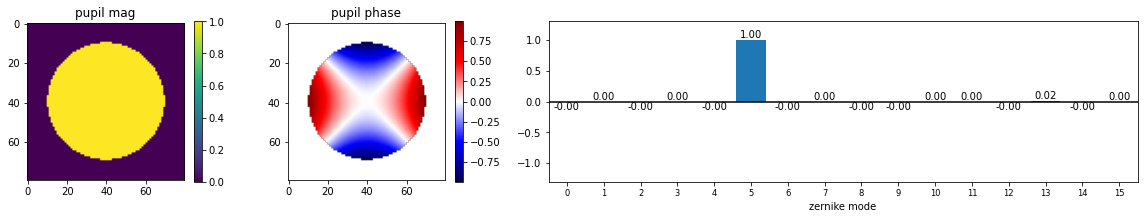

In [7]:
reload(dataset)

a = dataset.FourierOptics3DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

6:	 [x = -1.515,], [y = -2.194,],
2:	 [x = -2.678,], [y = 4.165,],
1:	 [x = 2.373,], [y = 2.419,],
4:	 [x = -1.990,], [y = 1.243,],
3:	 [x = -0.432,], [y = -0.286,],
0:	 [x = 0.145,], [y = -1.636,],
5:	 [x = 2.844,], [y = 3.843,],
7:	 [x = 0.505,], [y = -4.291,],


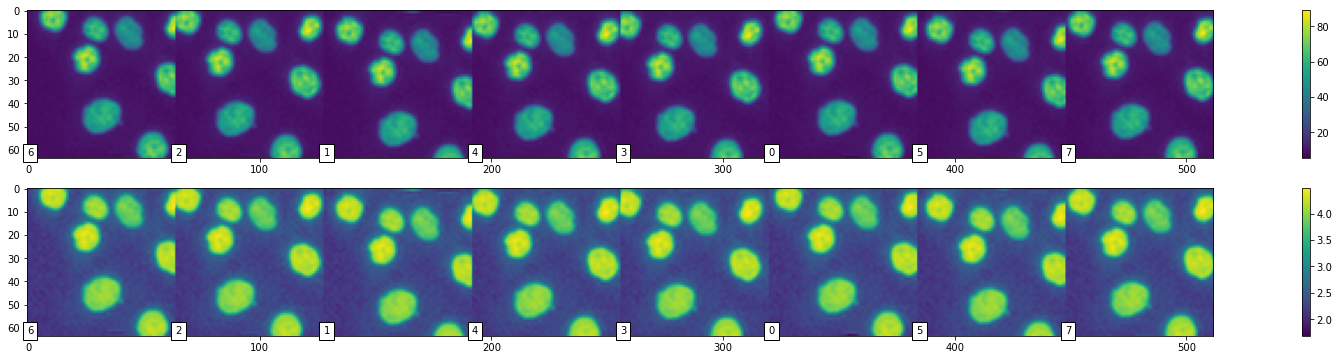

In [8]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               img_params={'shifts':[5, 5],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)